In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ann_visualizer.visualize import ann_viz;

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model

from IPython.display import SVG, Image

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
# from livelossplot.keras import PlotLossesCallback
import tensorflow as tf

BASE_DIR = '/media/abel/TERA/School/5to/IA/IA Project/fer2013'
TRAIN_DIR = os.path.join(BASE_DIR,'train')
TEST_DIR = os.path.join(BASE_DIR,'test')

total_train = 0
total_test = 0

for e in os.listdir(TRAIN_DIR):
    total_train +=  len(os.listdir(os.path.join(TRAIN_DIR,e)))

for e in os.listdir(TEST_DIR):
    total_test +=  len(os.listdir(os.path.join(TEST_DIR,e)))

print('train length:',total_train)
print('test length:',total_test)


train length: 28709
test length: 7178


In [28]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(directory=TRAIN_DIR,
                                                 target_size=(img_size, img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)

validation_generator=datagen_validation.flow_from_directory(directory=TEST_DIR,
                                                 target_size=(img_size, img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [29]:
model = Sequential()
# 1 - conv
model.add(Conv2D(64,(5,5), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 2 - conv
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 3 - conv
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 4 - conv
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt=Adam(learning_rate=0.0005)
model.compile(optimizer=opt ,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 128)      

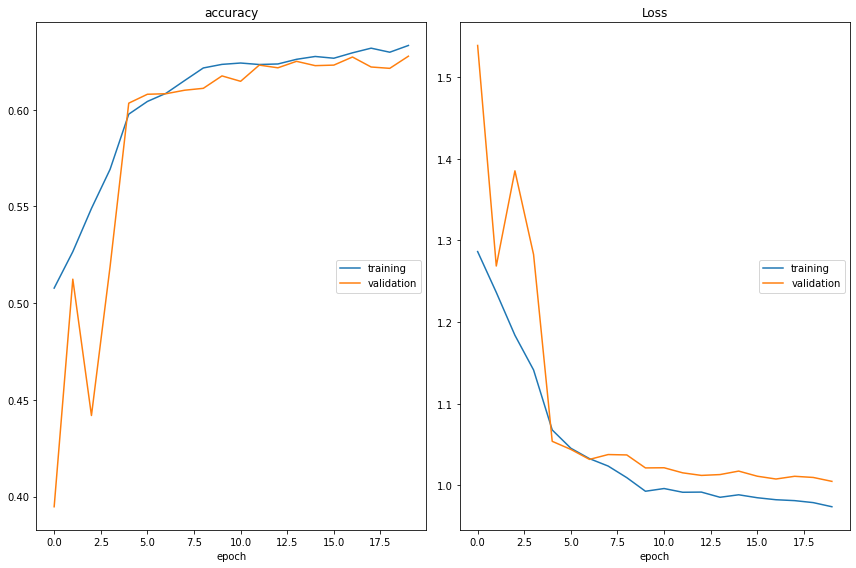

accuracy
	training         	 (min:    0.508, max:    0.633, cur:    0.633)
	validation       	 (min:    0.395, max:    0.628, cur:    0.628)
Loss
	training         	 (min:    0.974, max:    1.286, cur:    0.974)
	validation       	 (min:    1.005, max:    1.539, cur:    1.005)

Epoch 20: saving model to model_weights.h5
448/448 [==============================] - 16s 36ms/step - loss: 0.9738 - accuracy: 0.6332 - val_loss: 1.0049 - val_accuracy: 0.6277 - lr: 1.0000e-05


In [33]:

epochs= 20
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                            save_weights_only=True, mode='max', verbose=1)
reduce_lr= ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, mode='auto')
callbacks = [ PlotLossesKeras(),checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


In [34]:
# ann_viz(model, title="Convolutional Neural Network for emotions recognition")
model.save('emotions_rec_2.0.h5')

# model_json = model.to_json()
# with open("model.json","w") as json_file:
#     json_file.write(model_json)
    

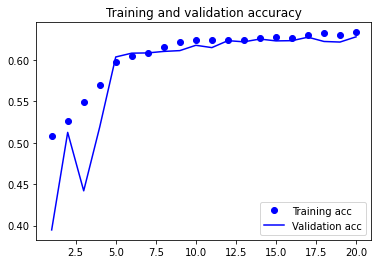

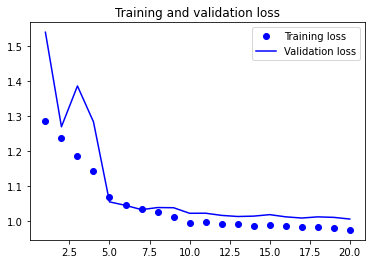

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()